working on ./camera_cal/calibration10.jpg
working on ./camera_cal/calibration11.jpg
working on ./camera_cal/calibration12.jpg
working on ./camera_cal/calibration13.jpg
working on ./camera_cal/calibration14.jpg
working on ./camera_cal/calibration15.jpg
working on ./camera_cal/calibration16.jpg
working on ./camera_cal/calibration17.jpg
working on ./camera_cal/calibration18.jpg
working on ./camera_cal/calibration19.jpg
working on ./camera_cal/calibration2.jpg
working on ./camera_cal/calibration20.jpg
working on ./camera_cal/calibration3.jpg
working on ./camera_cal/calibration6.jpg
working on ./camera_cal/calibration7.jpg
working on ./camera_cal/calibration8.jpg
working on ./camera_cal/calibration9.jpg
ok


Text(0.5,1,'Undistorted Image')

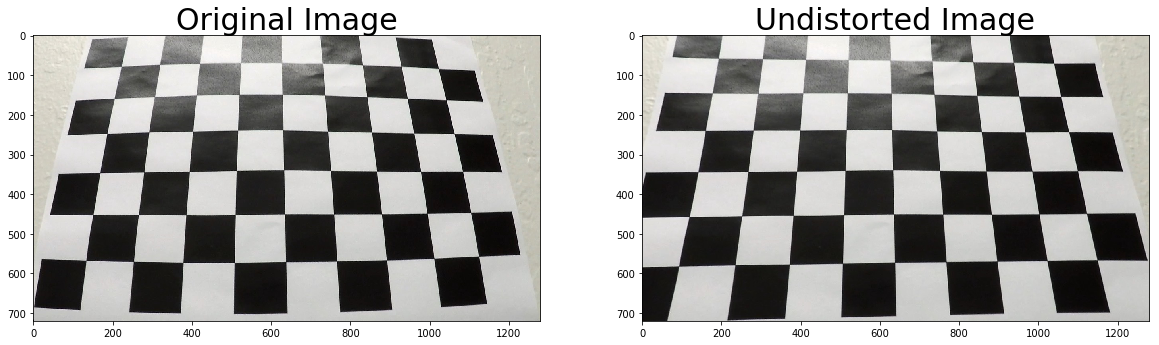

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle

# step 1: Calibration of Camera 

#%matplotlib qt
#prepare object points in form of (x,y,z) and z is always 0

objp = np.zeros((6*9,3),np.float32)
objp[:,:2] =np.mgrid[0:9,0:6].T.reshape(-1,2) # x,y coordinates


#arrays to store object points and image points from all the images

objpoints = [] #3D point in real world space
imgpoints = [] #2D points in image plane


#Read in and make a list of calibration image

images = glob.glob('./camera_cal/calibration*.jpg')

for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #find the chessboard corners
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)

    #if corners are found , add object points, image points
    if ret == True:
        print('working on',fname)
        imgpoints.append(corners)
        objpoints.append(objp)
    
        # draw and display the corner 
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        cv2.waitKey(500)


cv2.destroyAllWindows()


img = mpimg.imread('./camera_cal/calibration3.jpg')
img_size=(img.shape[1],img.shape[0])

#on camera calibration given object points and image points
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./calibration3_undistort.jpg',dst)

print('ok')
#save the camera calibration results 
dist_pickle={}
dist_pickle["mtx"]=mtx
dist_pickle["dist"]=dist
pickle.dump(dist_pickle, open( "./wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)